# Data PipeLine

## Train Dataset

In [1]:
import tensorflow as tf
from src.dataPipeline.train_val import create_split
from config.data_pipeline_config import get_train_val_pipeline_config

cfg = get_train_val_pipeline_config()

options = tf.data.Options()
options.threading.private_threadpool_size = 48

dataset_path = '/home/anirudhan/project/fusion/data/memmaps/train_images10.tfrecords.gz'
# dataset = tf.data.TFRecordDataset(dataset_path, compression_type="GZIP").with_options(options)
# dataset = dataset.map(_parse_function).map(_reshape).map(lambda x: normalize_image(x, 'train')).map(_resize)
train_dataset, no_train_samples = create_split(dataset_path, 16, 'train', shuffle_buffer_size=5_00, cfg=cfg)
train_dataset = train_dataset.as_numpy_iterator()

2024-03-27 05:37:26.089306: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 05:37:26.551300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/anirudhan/miniconda3/envs/fusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-03-27 05:37:28.339680: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 05:37:28.355488: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 05:37:28.355640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


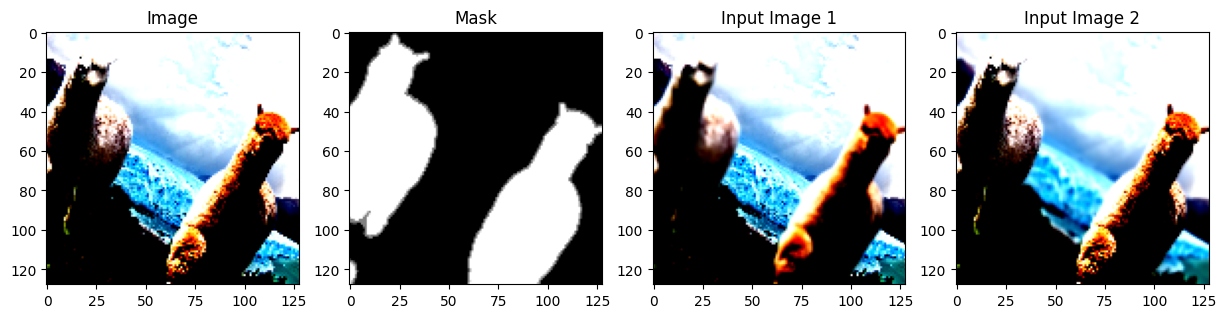

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


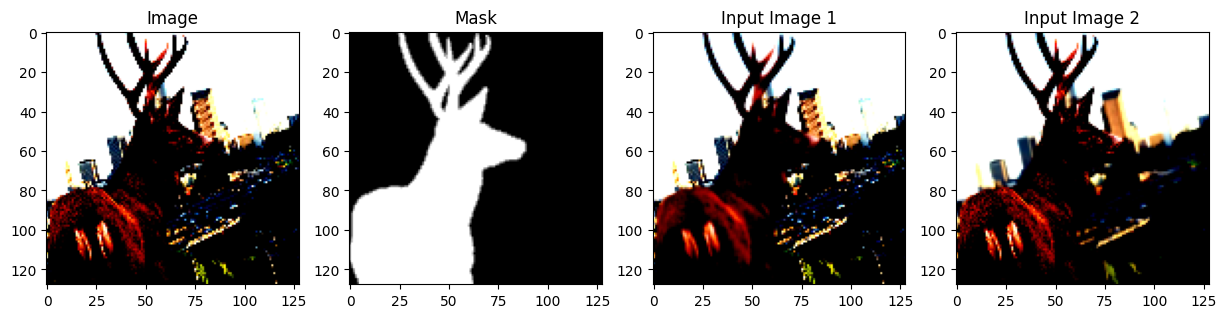

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


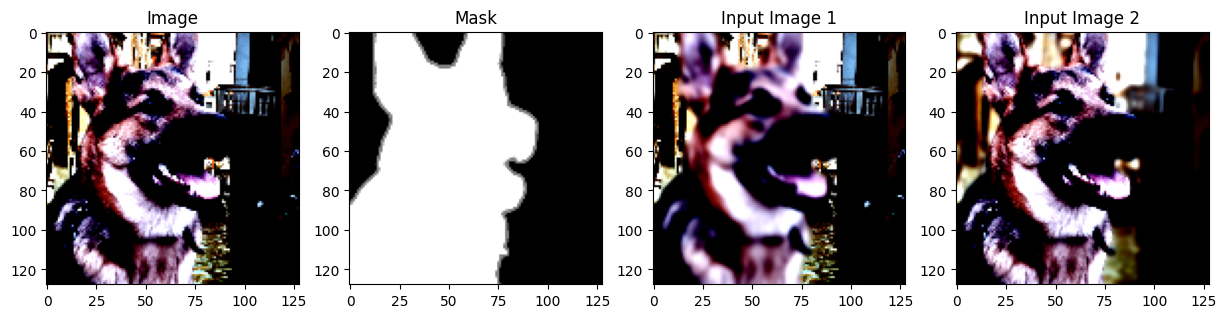

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


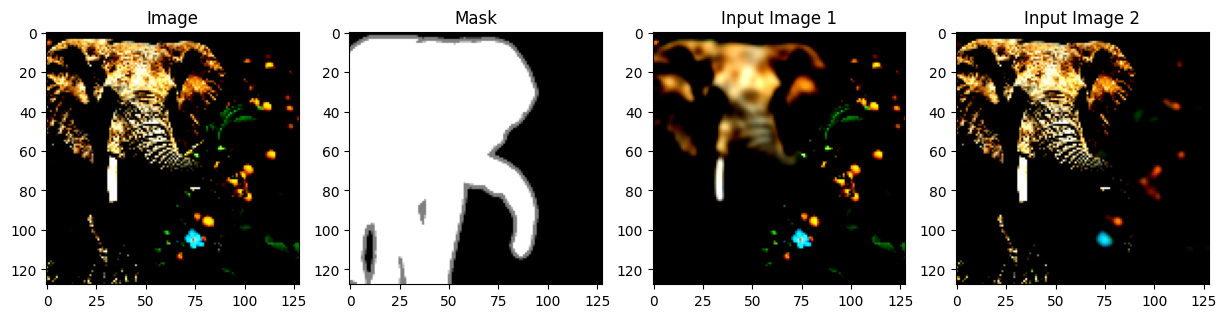

In [2]:
import tensorflow as tf
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt

for i, parsed_record in enumerate(train_dataset):
    # Decode all images
    # img = tf.reshape(tf.io.decode_raw(parsed_record['image'], tf.uint8), (512, 512, 3)).numpy()
    # mask = tf.reshape(tf.io.decode_raw(parsed_record['mask'], tf.uint8), (512, 512, 3)).numpy()  # Assuming similar shape
    # input_img_1 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_1'], tf.uint8), (512, 512, 3)).numpy()
    # input_img_2 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_2'], tf.uint8), (512, 512, 3)).numpy()
    img = parsed_record['image']
    mask = parsed_record['mask']
    input_img_1 = parsed_record['input_img_1']
    input_img_2 = parsed_record['input_img_2']
    # Create subplots with labels
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Adjust figsize as needed
    axes[0].imshow(img[0])
    axes[0].set_title("Image")
    axes[1].imshow(mask[0])
    axes[1].set_title("Mask")
    axes[2].imshow(input_img_1[0])
    axes[2].set_title("Input Image 1")
    axes[3].imshow(input_img_2[0])
    axes[3].set_title("Input Image 2")
    plt.show()
    if i == 3 : break


## val data

In [3]:
options = tf.data.Options()
options.threading.private_threadpool_size = 48

cfg.COMPRESSION = 'GZIP'
dataset_path = '/home/anirudhan/project/fusion/data/memmaps/val_images.tfrecords.gz'
# dataset = tf.data.TFRecordDataset(dataset_path, compression_type="GZIP").with_options(options)
# dataset = dataset.map(_parse_function).map(_reshape).map(lambda x: normalize_image(x, 'train')).map(_resize)
val_dataset, no_train_samples = create_split(dataset_path, 16, 'val', cfg=cfg)
val_dataset = val_dataset.as_numpy_iterator()

2024-03-25 09:34:23.090391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


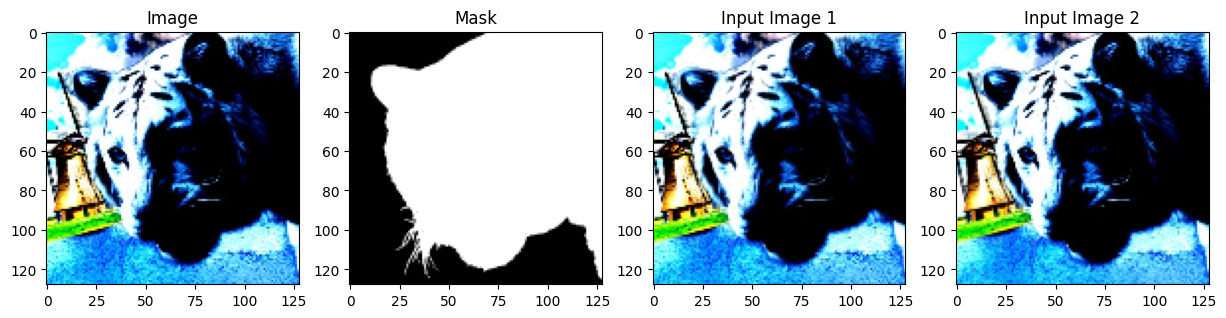

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


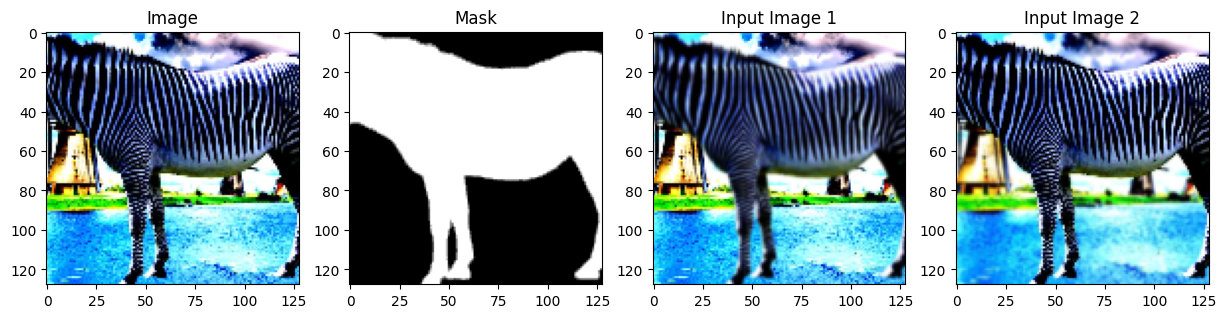

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


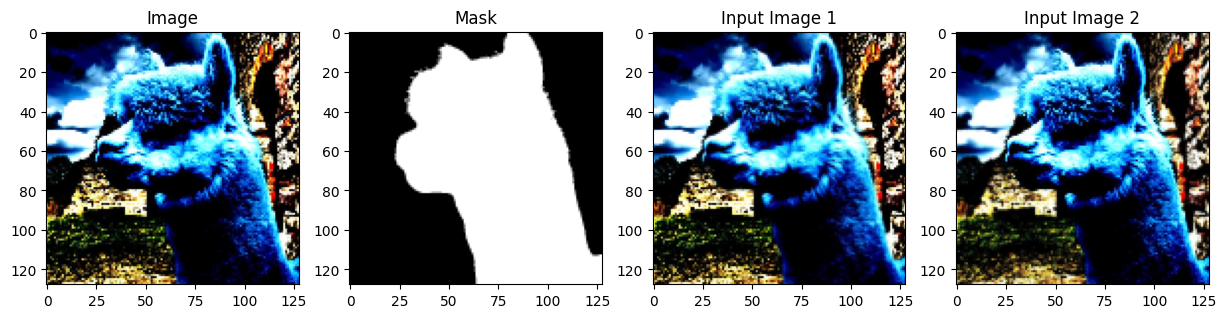

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


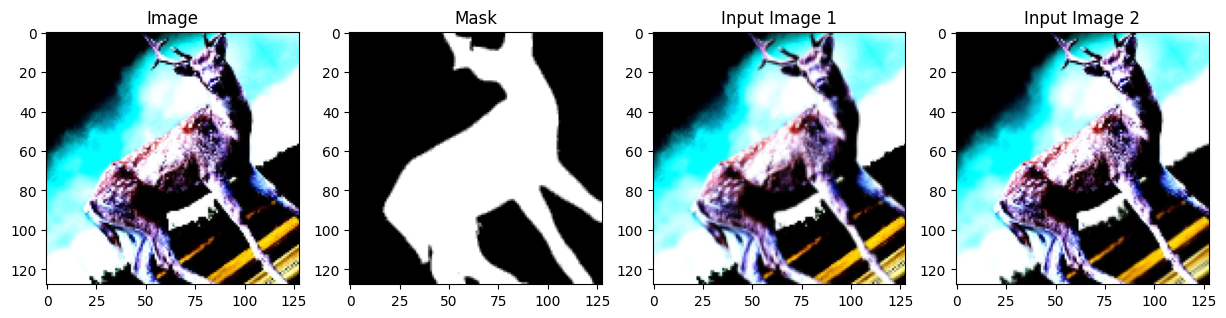

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


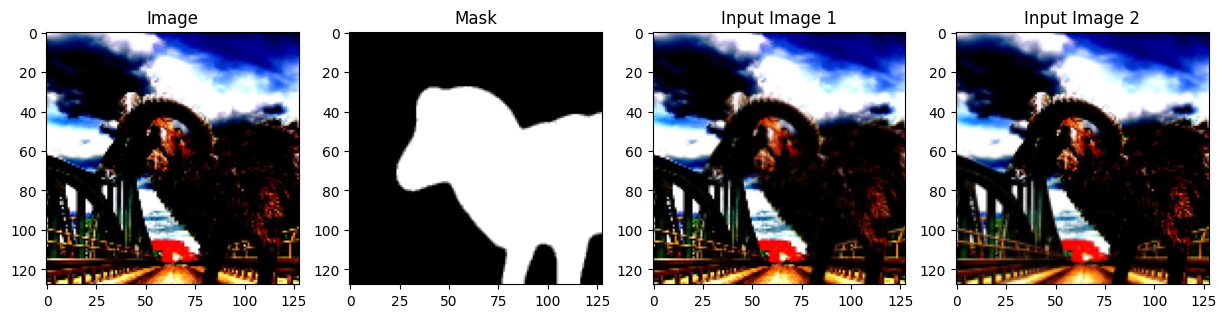

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


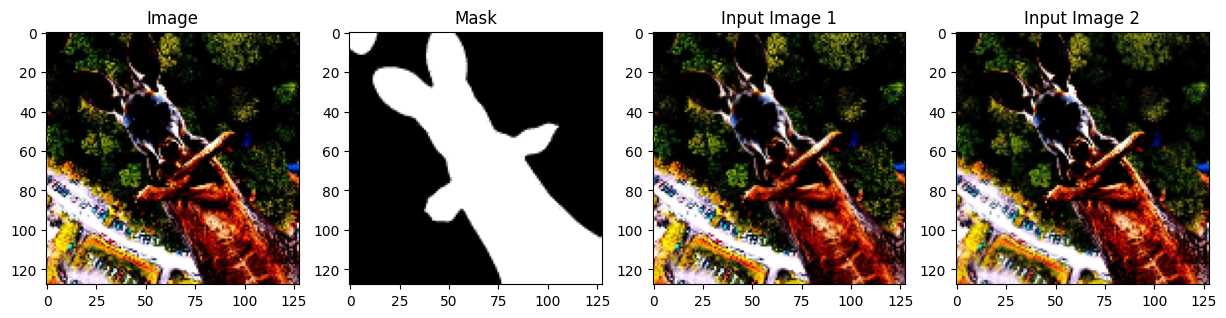

In [4]:
import tensorflow as tf
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt

for i, parsed_record in enumerate(val_dataset):
    # Decode all images
    # img = tf.reshape(tf.io.decode_raw(parsed_record['image'], tf.uint8), (512, 512, 3)).numpy()
    # mask = tf.reshape(tf.io.decode_raw(parsed_record['mask'], tf.uint8), (512, 512, 3)).numpy()  # Assuming similar shape
    # input_img_1 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_1'], tf.uint8), (512, 512, 3)).numpy()
    # input_img_2 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_2'], tf.uint8), (512, 512, 3)).numpy()
    img = parsed_record['image']
    mask = parsed_record['mask']
    input_img_1 = parsed_record['input_img_1']
    input_img_2 = parsed_record['input_img_2']
    # Create subplots with labels
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Adjust figsize as needed
    axes[0].imshow(img[0])
    axes[0].set_title("Image")
    axes[1].imshow(mask[0])
    axes[1].set_title("Mask")
    axes[2].imshow(input_img_1[0])
    axes[2].set_title("Input Image 1")
    axes[3].imshow(input_img_2[0])
    axes[3].set_title("Input Image 2")
    plt.show()
    if i == 5 : break


## test data

In [7]:
from src.dataPipeline.test import val_data 
from config.data_pipeline_config import get_test_pipeline_config

test_cfg = get_test_pipeline_config()

test_dataset= val_data('/home/anirudhan/project/fusion/data/RealMFF/data.csv', batch_size=2).as_numpy_iterator()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


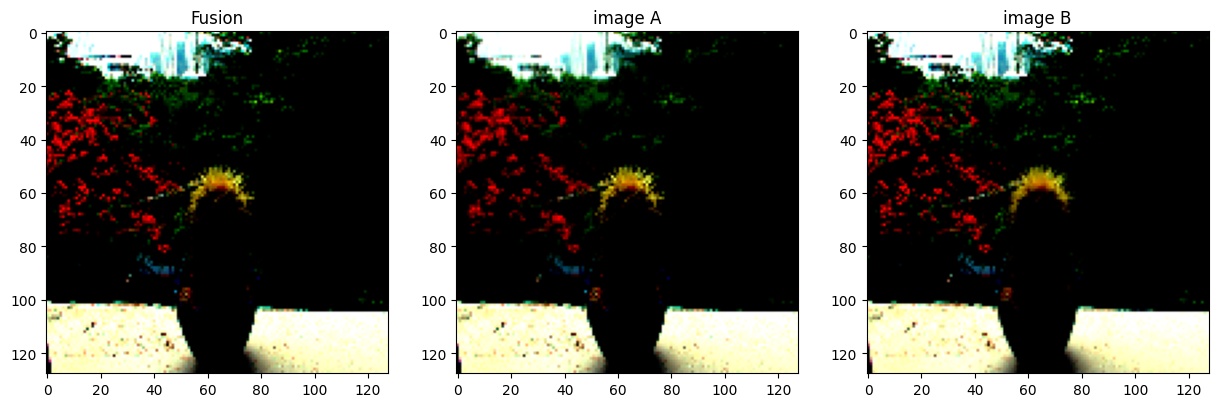

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


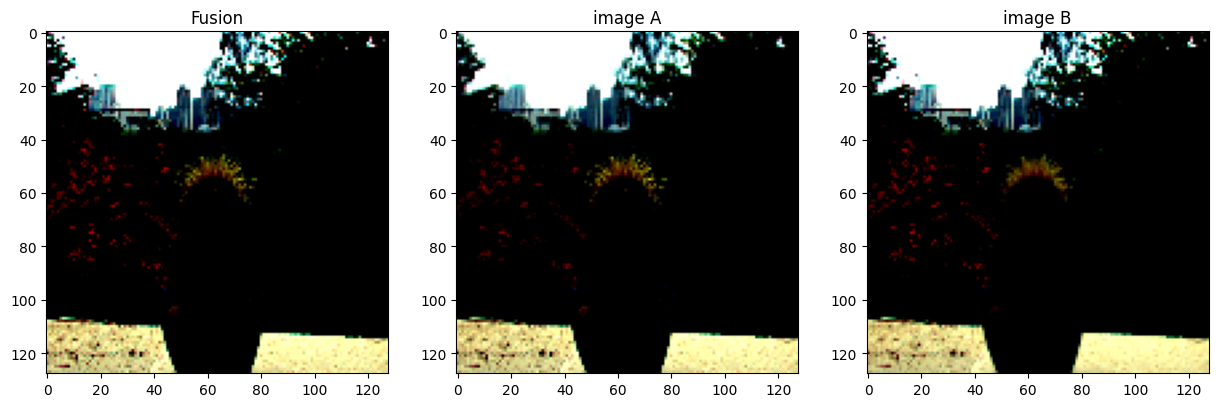

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


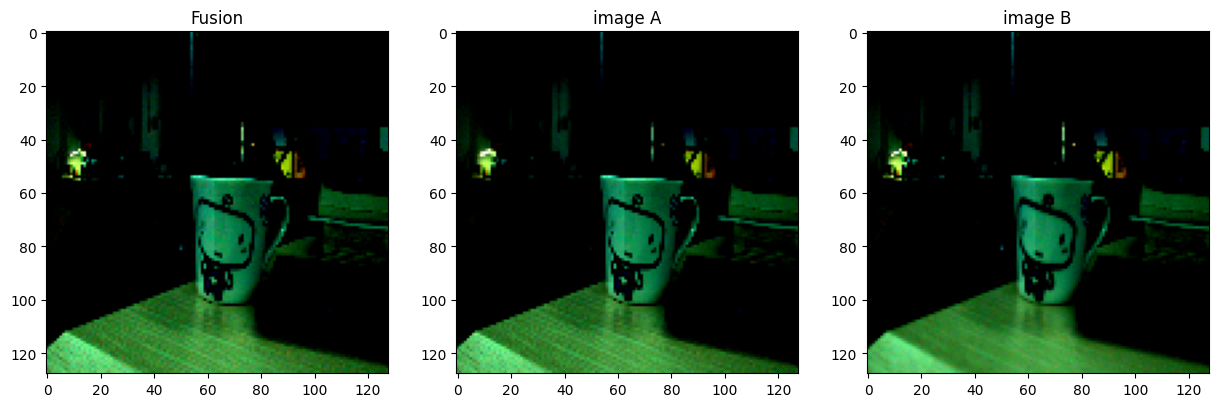

In [8]:
from matplotlib import pyplot as plt
for i, parsed_record in enumerate(test_dataset):
    # Decode all images
    # img = tf.reshape(tf.io.decode_raw(parsed_record['image'], tf.uint8), (512, 512, 3)).numpy()
    # mask = tf.reshape(tf.io.decode_raw(parsed_record['mask'], tf.uint8), (512, 512, 3)).numpy()  # Assuming similar shape
    # input_img_1 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_1'], tf.uint8), (512, 512, 3)).numpy()
    # input_img_2 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_2'], tf.uint8), (512, 512, 3)).numpy()
    fusion = parsed_record['Fusion']
    imageA = parsed_record['imageA']
    imageB = parsed_record['imsgeB']
    # Create subplots with labels
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed
    axes[0].imshow(fusion[0])
    axes[0].set_title("Fusion")
    axes[1].imshow(imageA[0])
    axes[1].set_title("image A")
    axes[2].imshow(imageB[0])
    axes[2].set_title("image B")
    plt.show()
    if i == 2 : break

the dataset loaded from the tfrecoerd need to

*   The dataset is loaded from the tfrecord.
* The images in the dataset are in the dimension (512, 512, 3).
* These images need to be reshaped to the dimensions required by the model.
* The reshaped images are then normalized acording to the split
* All the reshaped images are converted to numpy format for the model.



# Pytorch Model

## dataloader

using albumrntion to augment images form the tf record for more generalization of the model and redusing simulated data size


In [2]:
import numpy as np
import albumentations as A
def augment(data):
    temp_data = {'image': [], 'mask': [], 'input_img_1': [], 'input_img_2': []}
    for i in range(data['image'].shape[0]):
        temp = albumentation_transform(image=data['image'][i],
                                          mask=data['mask'][i],
                                          input_img_1=data['input_img_1'][i],
                                          input_img_2=data['input_img_2'][i])
        temp_data['image'].append(temp['image'])
        temp_data['mask'].append(temp['mask'])
        temp_data['input_img_1'].append(temp['input_img_1'])
        temp_data['input_img_2'].append(temp['input_img_2'])

    data['image'] = np.stack(temp_data['image'], axis=0)
    data['mask'] = np.stack(temp_data['mask'], axis=0)
    data['input_img_1'] = np.stack(temp_data['input_img_1'], axis=0)
    data['input_img_2'] = np.stack(temp_data['input_img_2'], axis=0)
    return data

albumentation_transform = A.Compose([
        # A.augmentations.geometric.transforms.Affine(
        #     # scale=[0.6,1.0],
        #     translate_percent=0.5,
        #     # translate_px=[0,1],
        #     rotate=[-45,45],
        #     shear=[-45,45],
        #     # interpolation=1,
        # )
        #A.Resize(height=800, width=600),
        A.Rotate(limit=45),
        # A.CenterCrop(height=1000, width=1000),
        A.HorizontalFlip(p=0.5),
        #A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ],
    additional_targets={'image':'image','input_img_1':'image', 'input_img_2':'image', 'mask':'image'},
    is_check_shapes=False,
    )


In [3]:
import torch
def numpy_to_torch(data):
    return dict(map(lambda item: (item[0], torch.from_numpy(item[1].copy()).permute(0, 3, 1, 2)), data.items()))

In [4]:
numpy_train_data = map(augment, train_dataset)
train_data_iter = map(numpy_to_torch, numpy_train_data)


val_data_iter = map(numpy_to_torch, val_dataset)
test_data_iter = map(numpy_to_torch, test_dataset)

NameError: name 'val_dataset' is not defined

## Model

In [1]:
from 

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
segment_model = SegmentFocus([16, 32], 16)
# segment_model.load_state_dict(torch.load('/content/model.pth'))

# deblur_model = fftformer()
# deblur_model.load_state_dict(torch.load('/content/drive/MyDrive/fusion/Fusionv2/model/FFTformer/pretrain_model/fftformer_GoPro.pth'))

# class DiffusionAwareFusion(nn.Module):
#     def __init__(self, segment_model, deblur_model):
#         super(DiffusionAwareFusion, self).__init__()
#         self.segment_model = segment_model
#         self.deblur_model = deblur_model

#     def forward(self, img1, img2):
#         b, c, h, w = img1.shape
#         h_n = (32 - h % 32) % 32
#         w_n = (32 - w % 32) % 32

#         initial_fused_image, duffusion_mask = self.segment_model(img1, img2)
#         initial_fused_image = torch.nn.functional.pad(initial_fused_image, (0, w_n, 0, h_n), mode='reflect')
#         deblured_image = self.deblur_model(initial_fused_image)
#         deblured_image = deblured_image[:, :, :h, :w]
#         fused_image = initial_fused_image*(1-duffusion_mask) + deblured_image*duffusion_mask
#         return fused_image, duffusion_mask.data

# model  = DiffusionAwareFusion(segment_model, deblur_model)
model  = segment_model
model = model.to(device)

# img1 = torch.randn(1, 3, 128, 128).to(device)
# img2 = torch.randn(1, 3, 128, 128).to(device)
# output, _ = model(img1, img2)


/home/anirudhan/miniconda3/envs/fusion/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


freezing all the paramets of debluring model before trainig

In [4]:
opt_mdoel = torch.compile(model)

In [ ]:
for param in model.deblur_model.parameters():
    param.requires_grad = False

## Loss Function

### dice Loss

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


class GALoss(nn.Module):
    """
    The Class of GALoss
    """
    def __init__(self):
        super(GALoss, self).__init__()
        self._smooth = 1

    def _dice_loss(self, predict, target):
        """
        Compute the dice loss of the prediction decision map and ground-truth label
        :param predict: tensor, the prediction decision map
        :param target: tensor, ground-truth label
        :return:
        """
        n = predict.shape[0]
        target = target.float()
        # predict = predict.view(-1)
        # target = target.view(-1)
        intersect = torch.sum(predict * target)
        y_sum = torch.sum(target * target)
        z_sum = torch.sum(predict * predict)
        loss = (2 * intersect + self._smooth) / (z_sum + y_sum + self._smooth)
        loss = 1 - loss
        loss = torch.mean(loss)
        return loss

    def _qg_soft(self, img1, img2, fuse, k):
        """
        Compute the Qg for the given two image and the fused image.
        The calculation of Qg is modified to the python version based on the
        matlab version from https://github.com/zhengliu6699/imageFusionMetrics
        :param img1: tensor, input image A
        :param img2: tensor, input image B
        :param fuse: tensor, fused image
        :param k: softening factor
        :return:
        """
        # 1) get the map
        img1_gray = img1
        img2_gray = img2
        buf = 0.000001
        flt1 = torch.FloatTensor(np.array([
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1], ])).reshape((1, 1, 3, 3)).cuda(img1.device)
        flt2 = torch.FloatTensor(np.array([
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1], ])).reshape((1, 1, 3, 3)).cuda(img1.device)
        fuseX = F.conv2d(fuse, flt1, padding=1) + buf
        fuseY = F.conv2d(fuse, flt2, padding=1)
        fuseG = torch.sqrt(torch.mul(fuseX, fuseX) + torch.mul(fuseY, fuseY))
        buffer = (fuseX == 0)
        buffer = buffer.float()
        buffer = buffer * buf
        fuseX = fuseX + buffer
        fuseA = torch.atan(torch.div(fuseY, fuseX))

        img1X = F.conv2d(img1_gray, flt1, padding=1)
        img1Y = F.conv2d(img1_gray, flt2, padding=1)
        img1G = torch.sqrt(torch.mul(img1X, img1X) + torch.mul(img1Y, img1Y))
        buffer = (img1X == 0)
        buffer = buffer.float()
        buffer = buffer * buf
        img1X = img1X + buffer
        img1A = torch.atan(torch.div(img1Y, img1X))

        img2X = F.conv2d(img2_gray, flt1, padding=1)
        img2Y = F.conv2d(img2_gray, flt2, padding=1)
        img2G = torch.sqrt(torch.mul(img2X, img2X) + torch.mul(img2Y, img2Y))
        buffer = (img2X == 0)
        buffer = buffer.float()
        buffer = buffer * buf
        img2X = img2X + buffer
        img2A = torch.atan(torch.div(img2Y, img2X))

        # 2) edge preservation estimation

        buffer = (img1G == 0)
        buffer = buffer.float()
        buffer = buffer * buf
        img1G = img1G + buffer
        buffer1 = torch.div(fuseG, img1G)

        buffer = (fuseG == 0)
        buffer = buffer.float()
        buffer = buffer * buf
        fuseG = fuseG + buffer
        buffer2 = torch.torch.div(img1G, fuseG)

        bimap = torch.sigmoid(-k * (img1G - fuseG))
        bimap_1 = torch.sigmoid(k * (img1A - fuseA))
        Gaf = torch.mul(bimap, buffer2)+torch.mul((1 - bimap), buffer1)
        Aaf = torch.abs(torch.abs(img1A - fuseA) - np.pi/2)*2/np.pi

        # -------------------
        buffer = (img2G == 0)
        buffer = buffer.float()
        buffer = buffer*buf
        img2G = img2G+buffer
        buffer1 = torch.div(fuseG, img2G)

        buffer = (fuseG == 0)
        buffer = buffer.float()
        buffer = buffer*buf
        fuseG = fuseG+buffer
        buffer2 = torch.div(img2G, fuseG)

        # bimap = torch.sigmoid(-k * (img2G-fuseG))
        bimap = torch.sigmoid(-k * (img2G-fuseG))
        bimap_2 = torch.sigmoid(k * (img2A-fuseA))
        Gbf = torch.mul(bimap, buffer2)+torch.mul((1-bimap), buffer1)
        Abf = torch.abs(torch.abs(img2A-fuseA) - np.pi/2) * 2 / np.pi

        # some parameter
        gama1 = 1
        gama2 = 1
        k1 = -10
        k2 = -20
        delta1 = 0.5
        delta2 = 0.75

        Qg_AF = torch.div(gama1, (1 + torch.exp(k1 * (Gaf - delta1))))
        Qalpha_AF = torch.div(gama2, (1+torch.exp(k2 * (Aaf - delta2))))
        Qaf = torch.mul(Qg_AF, Qalpha_AF)

        Qg_BF = torch.div(gama1, (1 + torch.exp(k1 * (Gbf - delta1))))
        Qalpha_BF = torch.div(gama2, (1 + torch.exp(k2 * (Abf - delta2))))
        Qbf = torch.mul(Qg_BF, Qalpha_BF)

        # 3) compute the weighting matrix
        L = 1
        Wa = torch.pow(img1G, L)
        Wb = torch.pow(img2G, L)
        res = torch.mean(torch.div(torch.mul(Qaf, Wa) + torch.mul(Qbf, Wb), (Wa + Wb)))

        return res
    def forward(self, mask, gt_mask, k=10e4):
        """
        Compute the GALoss
        :param img1: tensor, input image A
        :param img2: tensor, input image B
        :param mask: tensor, the prediction decision map without bounary guider filter
        :param mask_BGF: tensor, the prediction decision map with bounary guider filter
        :param gt_mask: tensor, the ground-truth decision map
        :param k: the softening factor of loss_qg
        :return:
        """

        loss_dice = self._dice_loss(mask, gt_mask)

        return loss_dice
    # def forward(self, img1, img2, mask, mask_BGF, gt_mask, k=10e4):
    #     """
    #     Compute the GALoss
    #     :param img1: tensor, input image A
    #     :param img2: tensor, input image B
    #     :param mask: tensor, the prediction decision map without bounary guider filter
    #     :param mask_BGF: tensor, the prediction decision map with bounary guider filter
    #     :param gt_mask: tensor, the ground-truth decision map
    #     :param k: the softening factor of loss_qg
    #     :return:
    #     """
    #     fused = torch.mul(mask_BGF, img1) + torch.mul((1 - mask_BGF), img2)
    #     loss_qg = 1 - self._qg_soft(img1, img2, fused, k)
    #     loss_dice = self._dice_loss(mask, gt_mask)

    #     return loss_dice + loss_qg, loss_dice, loss_qg

## Training

In [13]:
import torch

def mask_to_one_hot(mask, num_classes=3):
    """Converts a mask to one-hot encoding, handling diffusion labels and different numerical ranges.

    Args:
        mask (torch.Tensor): Input mask tensor.
        num_classes (int, optional): Number of classes for one-hot encoding. Defaults to 3.

    Returns:
        torch.Tensor: One-hot encoded mask tensor.
    """

    diffusion_label = torch.ones_like(mask) * 2  # Create diffusion label tensor
    mask_bins = torch.where(
        mask > 0,  # Condition for non-zero values
        torch.where(mask < 1, diffusion_label, mask),  # Apply diffusion label if 0 < mask < 1
        mask  # Keep original mask values for 0 or 1
    )
    one_hot_mask = torch.nn.functional.one_hot(mask_bins.long(), num_classes).permute(0, 3, 1, 2)
    return one_hot_mask



In [14]:
import matplotlib.pyplot as plt
def plt_torch(image):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    plt.imshow(image)
    plt.show()

In [15]:
import torch

def check_and_replace_nan(tensor):
  """
  Checks if a PyTorch tensor contains NaN values and replaces them with ones of the same shape.

  Args:
      tensor: The PyTorch tensor to check.

  Returns:
      A new PyTorch tensor with NaN values replaced by ones, or the original tensor if no NaNs were found.
  """

  # Check if any element is NaN
  if torch.isnan(tensor).any():
    # Create a mask of NaN values
    nan_mask = torch.isnan(tensor)

    # Replace NaN values with ones using masked_fill
    return tensor.masked_fill(nan_mask, 1.0)
  else:
    # No NaN values found, return the original tensor
    return tensor


In [16]:
from lightning import Fabric
from lightning.fabric.loggers import TensorBoardLogger
import torch.optim as optim
import torch.nn as nn
import gc
import torch

In [23]:
# del model
# del loss


# del output
# del gt_image
# del image1
# del image2
# del mask
# del data

torch.cuda.empty_cache()
gc.collect()

0

In [ ]:
data = next(iter(train_data_iter))
data['mask'] = check_and_replace_nan(data['mask'])
mask = mask_to_one_hot(data['mask'][:,0,:,:]).to(device)
mask = data['mask'].to(device)
gt_image = data['image'].to(device)
image1 = data['input_img_1'].to(device)
image2 = data['input_img_2'].to(device)

In [ ]:
model.train()
model = model.to(device)
model(image1[:2], image2[:2])

(tensor([[[[-1.3571e+00, -9.6040e-01, -1.5472e-01,  ..., -1.9200e-02,
             3.2788e-01,  4.1455e-01],
           [-1.4368e+00, -1.1678e+00, -5.6624e-01,  ...,  1.4325e-01,
             8.4231e-02,  4.6427e-01],
           [-1.4741e+00, -1.3580e+00, -9.5009e-01,  ...,  2.9163e-01,
            -5.4468e-02,  3.1413e-01],
           ...,
           [ 1.0075e+00,  9.9786e-01,  9.7855e-01,  ..., -4.0817e-01,
             1.9433e-01, -3.4461e-02],
           [ 1.0275e+00,  1.0159e+00,  9.6076e-01,  ..., -6.2803e-01,
            -1.5567e-03,  2.9740e+00],
           [ 1.0514e+00,  9.9728e-01,  9.7171e-01,  ...,  4.0426e+00,
             4.5483e+00,  2.8444e+00]],
 
          [[-1.3835e+00, -1.0765e+00, -3.8125e-01,  ..., -3.0759e-01,
             1.0388e-02,  1.2142e-01],
           [-1.4286e+00, -1.2312e+00, -7.3367e-01,  ..., -1.3009e-01,
            -2.3893e-01,  1.5048e-01],
           [-1.4516e+00, -1.3706e+00, -1.0709e+00,  ...,  4.0555e-02,
            -3.7703e-01, -4.4463e-03],


In [ ]:
diffusion_mask.shape

torch.Size([2, 1, 128, 128])

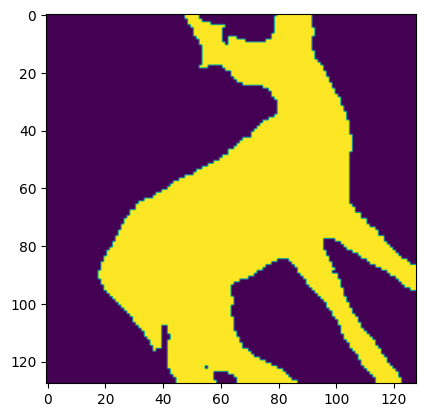

In [ ]:
plt.imshow(mask[1,1].detach().cpu())

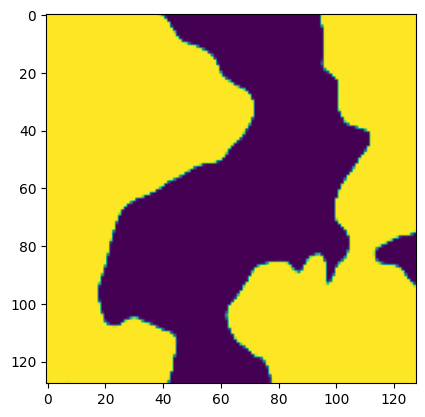

In [ ]:
plt.imshow(diffusion_mask[1,0].detach().cpu())

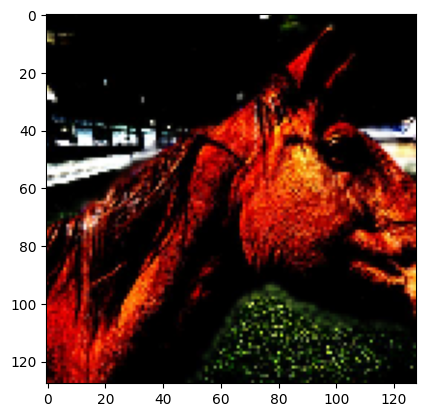

In [ ]:
plt_torch(output[1])

In [29]:
from Fusionv2.model.segment import *
from Fusionv2.model.loss import *
import gc

train_step = 150
grad_acc = 1

val_step = 5
diffusion_mask_w = 0.5

fabric = Fabric(accelerator="auto", strategy="auto", devices=1, precision='16-mixed')
tensorboard_logger = TensorBoardLogger(root_dir='/content/lightning_logs')
fabric.launch()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = SegmentFocus([32, 64, 128], 16)
# model = GACNFuseNet()
weight_decay = 0.001
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=weight_decay)

# model, optimizer = fabric.setup(model, optimizer)

criterion1 = FusionLoss().to(device)
criterion2 = GALoss().to(device)


model.train()

for epoch in range(10):
    train_loss = 0
    val_loss = 0
    model.train()
    for i, data in enumerate(train_data_iter):
        data['mask'] = check_and_replace_nan(data['mask'])
        mask = mask_to_one_hot(data['mask'][:,0,:,:]).to(device)
        mask = data['mask'].to(device)
        gt_image = data['image'].to(device)
        image1 = data['input_img_1'].to(device)
        image2 = data['input_img_2'].to(device)
        # optimizer.zero_grad()
        output, diffusion_mask = model(image1, image2)
        loss = criterion1(output, gt_image) #+ diffusion_mask_w*criterion2(diffusion_mask, mask[:,2,:,:])
        fabric.backward(loss)
        # optimizer.step()
        train_loss += loss.item()

        if i % grad_acc == 0:
            # print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item()}")
            optimizer.step()
            optimizer.zero_grad()

        # this code reoves local varibles to clear gpu ram
        del loss
        del output
        del gt_image
        del image1
        del image2
        del mask
        del data

        torch.cuda.empty_cache()
        gc.collect()

        if i % train_step == 0 and i != 0: break

    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_data_iter):
            data['mask'] = check_and_replace_nan(data['mask'])
            mask = mask_to_one_hot(data['mask'][:,0,:,:]).to(device)
            # mask = data['mask'].to(device)
            gt_image = data['image'].to(device)
            output, diffusion_mask = model(data['input_img_1'].to(device), data['input_img_2'].to(device))
            loss = criterion1(output, gt_image) #+ diffusion_mask_w*criterion2(diffusion_mask, mask[:,2,:,:])
            val_loss += loss.item()
            if i % val_step == 0 and i != 0: break

    print(f"Epoch {epoch+1}, Train Loss: {train_loss/train_step}, Val Loss: {val_loss/val_step}")



Using 16-bit Automatic Mixed Precision (AMP)
2024-03-24 17:24:00.092125: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 125829120 bytes after encountering the first element of size 12582912 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 1, Train Loss: 0.1534163915614287, Val Loss: 0.058622515946626666
Epoch 2, Train Loss: 0.09453304012616476, Val Loss: 0.057715185731649396
Epoch 3, Train Loss: 0.09298578351736068, Val Loss: 0.05790746212005615
Epoch 4, Train Loss: 0.08573398992419243, Val Loss: 0.05819238126277924
Epoch 5, Train Loss: 0.08857968757549922, Val Loss: 0.05889308899641037
Epoch 6, Train Loss: 0.08150497511029244, Val Loss: 0.05772556066513061
Epoch 7, Train Loss: 0.08413459405303002, Val Loss: 0.05637432113289833
Epoch 8, Train Loss: 0.07920741553107898, Val Loss: 0.05418173000216484
Epoch 9, Train Loss: 0.08228801767031352, Val Loss: 0.056740670651197436
Epoch 10, Train Loss: 0.0768026543656985, Val Loss: 0.05101427957415581


In [ ]:
train_loss

nan

In [ ]:
train_loss/i

0.5487798683751591

In [30]:
from skimage.metrics import structural_similarity, normalized_mutual_information
import numpy as np
import matplotlib.pyplot as plt

def test_step(model, dataset):
    test_loss = {'ssim':[], 'nmi':[]}
    model = model.eval()
    with torch.no_grad():
        for i, image in enumerate(dataset):  # Iterate through the dataset
            prediction, mask = model(image['imageA'].to(device), image['imsgeB'].to(device))
            prediction = prediction.permute(0, 2, 3, 1).cpu().detach().numpy()
            mask = mask.permute(0, 2, 3, 1).cpu().detach().numpy()

            loss1 = ssim_loss(denormalize_val_image(prediction), denormalize_val_image(image['Fusion'].permute(0, 2, 3, 1).cpu().detach().numpy()))
            loss2 = nmi_loss(denormalize_val_image(prediction), denormalize_val_image(image['Fusion'].permute(0, 2, 3, 1).cpu().detach().numpy()))
            #    loss = charbonnier_loss(prediction, image['Fusion']) + config.a*wavelet_loss(prdicted_dwt, image['Fusion'])
            test_loss['ssim'].append(loss1)
            test_loss['nmi'].append(loss2)
            if i == 0:
                    image = {key: value.permute(0, 2, 3, 1).numpy() for key, value in image.items()}
                    save_plot(image['imageA'][0], image['imsgeB'][0], mask[0], prediction[0], image['Fusion'][0])
            if i == 18: break
    return {key: np.mean(loss) for key, loss in test_loss.items()}

def nmi_loss(image1, image2):
    assert image1.shape == image2.shape
    n = image1.shape[0]
    loss = []
    for i in range(n):
        loss.append(normalized_mutual_information(image1[i], image2[i]))
    return np.mean(loss)

def ssim_loss(image1, image2):
    assert image1.shape == image2.shape
    n = image1.shape[0]
    loss = []
    for i in range(n):
        loss.append(structural_similarity(image1[i], image2[i],
                    channel_axis=2))
    return np.mean(loss)

def denormalize(image):
    image = image * test_cfg.STD + test_cfg.MEAN
    return image

def denormalize_images(func):
    """Decorator to denormalize images before passing them to a function."""

    def wrapper(*args, **kwargs):
        """Wrapper function to denormalize images."""
        denormalized_args = []
        for arg in args:
            if isinstance(arg, np.ndarray) and arg.ndim == 3:  # Check for images
                denormalized_args.append(denormalize(arg))
            else:
                denormalized_args.append(arg)
        return func(*denormalized_args, **kwargs)

    return wrapper

@denormalize_images
def save_plot(image1, image2, mask, prediction, ground_truth):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize for better layout

    # Image 1 (top left)
    axes[0, 0].imshow(image1.astype(np.uint8))
    axes[0, 0].set_title("Image 1")

    # Empty space (top right)
    axes[0, 1].axis('off')  # Turn off axes for empty space

    # Image 2 (top center)
    axes[0, 2].imshow(image2.astype(np.uint8))
    axes[0, 2].set_title("Image 2")

    # Mask (bottom left)
    axes[1, 0].imshow(prediction.astype(np.uint8))
    axes[1, 0].set_title("prediction")

    # Prediction (bottom center)
    axes[1, 1].imshow(mask.astype(np.uint8))
    axes[1, 1].set_title("Mask")

    # Ground Truth (bottom right)
    axes[1, 2].imshow(ground_truth.astype(np.uint8))
    axes[1, 2].set_title("Ground Truth")

    plt.tight_layout()
    plt.savefig("/home/anirudhan/project/fusion/results/plots/validation_plot.png")
    plt.close()  # Close the plot to avoid memory issues


def denormalize_val_image(image, mean=test_cfg.MEAN, std=test_cfg.STD):
  """
  Preprocesses an image by denormalizing, clipping, and converting to uint8.

  Args:
      image: A Jax tensor representing the normalized image.
      mean: A float value representing the mean used for normalization.
      std: A float value representing the standard deviation used for normalization.

  Returns:
      A Jax tensor representing the preprocessed image in uint8 format.
  """
  # Combine denormalization and clipping in a single step
  image = np.nan_to_num(image, nan=0)
#   print((image * std + mean).clip(min=0.0, max=255.0).astype(np.uint8))
  return (image * std + mean).clip(min=0.0, max=255.0).astype(np.uint8)


In [ ]:
model = model.eval()
image = next(iter(test_data_iter)) # Iterate through the dataset
prediction, mask = model(image1=image['imageA'].to(device), image2=image['imsgeB'].to(device))
prediction = prediction.permute(0, 2, 3, 1).cpu().detach().numpy()
loss = ssim_loss(denormalize_val_image(prediction), denormalize_val_image(image['Fusion'].permute(0, 2, 3, 1).cpu().detach().numpy()))
loss

0.39328795718125753

In [ ]:
model._forward_module
torch.save(model._forward_module.state_dict(),'/home/anirudhan/project/fusion/results/checkpoints/model.pth')

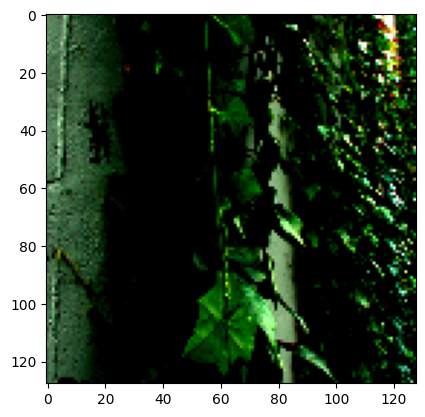

In [ ]:
plt.imshow(prediction[0])

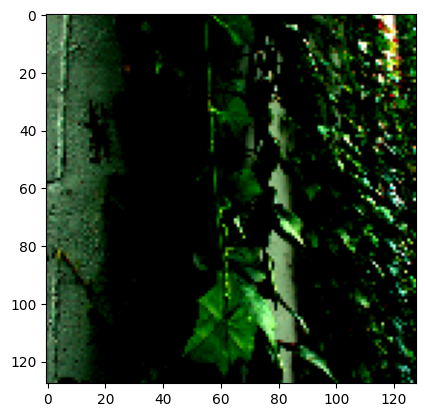

In [ ]:
plt.imshow(image['Fusion'].permute(0, 2, 3, 1).cpu().detach().numpy()[0])

In [ ]:
index = 5
image = {key: value.permute(0, 2, 3, 1).numpy() for key, value in image.items()}
save_plot(image['imageA'][index], image['imsgeB'][index], prediction[index], image['Fusion'][index])

FileNotFoundError: [Errno 2] No such file or directory: '/content/validation_plot.png'

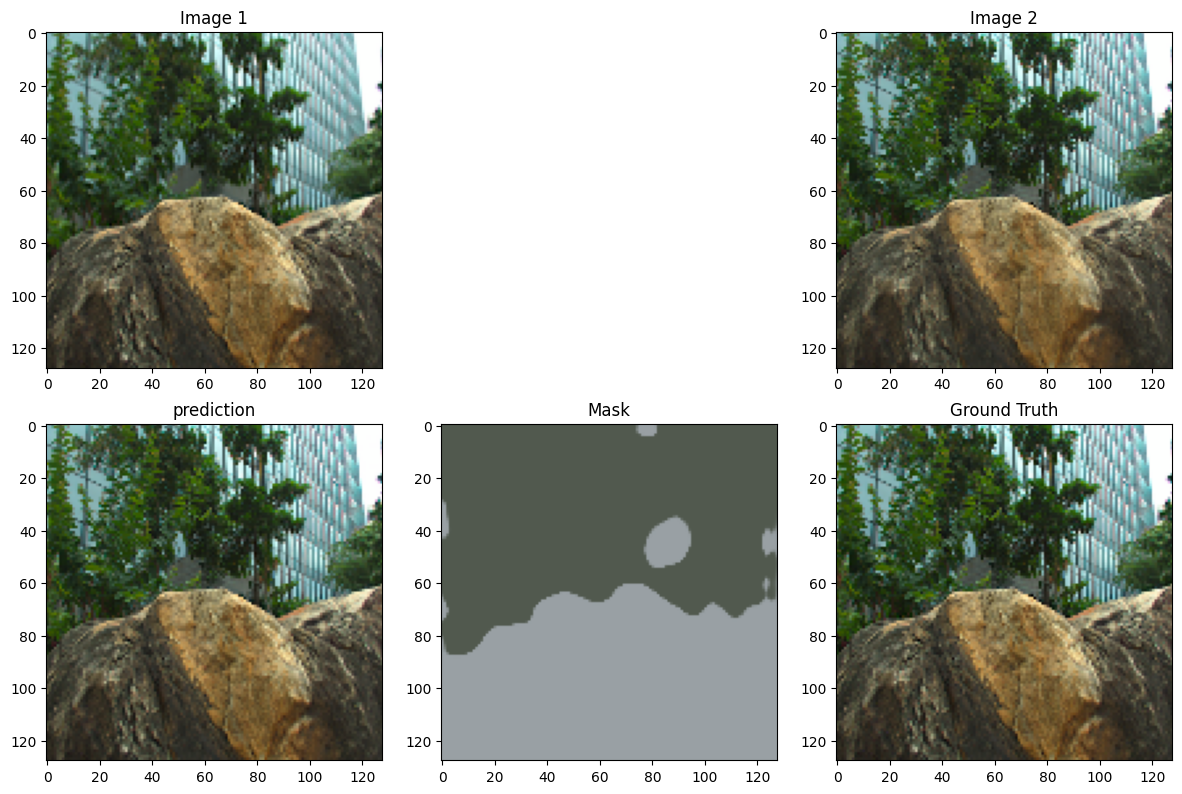

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
test_loss = test_step(model, test_data_iter)
print(f"Test metrics: {test_loss}")

In [ ]:
test_loss

0.9889835203294828

In [ ]:
import torch
torch.cuda.empty_cache()

#jax Model


In [ ]:
from Fusion_jax.train import config

ModuleNotFoundError: No module named 'ml_collections'

In [ ]:
import flax.linen as nn
import jax.numpy as jnp
import optax
from flax.training import train_state
import functools
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

config = get_default_configs()

ModuleNotFoundError: No module named 'config'

In [ ]:
%cd /content/drive/MyDrive/fusion/

/content/drive/MyDrive/fusion


In [ ]:
import jax
import einops
import jaxwt as jwt
Conv3x3 = partial(nn.Conv, kernel_size=(3,3), padding='SAME')
Conv7x7 = partial(nn.Conv, kernel_size=(7,7), padding='SAME')
rearange_width_first = lambda x: einops.rearrange(x, "n h w c -> n c h w")
rearange_height_first = lambda x: einops.rearrange(x, "n c h w -> n c w h")
Conv1x1 = partial(nn.Conv, padding='SAME')


#%%
class ConvBlock(nn.Module):
    dimention : int

    @nn.compact
    def __call__(self, image, train=False):
        feature = Conv3x3(self.dimention)(image)
        feature = nn.activation.gelu(feature)
        feature = nn.BatchNorm(use_running_average = not train)(feature)
        return feature

class SpatialSqueezeExcitation(nn.Module):

    @nn.compact
    def __call__(self, features):
        spartial_features = Conv7x7(1)(features)
        spartial_features = nn.activation.sigmoid(spartial_features)
        return spartial_features * features

class ChannelSqueezeExcitation(nn.Module):
  reduction :int = 2

  @nn.compact
  def __call__(self, features):
    n, h, w, c = features.shape
    channels = nn.avg_pool(features, window_shape=(h, w))
    channel_features = nn.Dense(c // self.reduction)(channels)
    channel_features = nn.activation.gelu(channel_features)
    channel_features = nn.Dense(c)(channel_features)
    channel_features = nn.activation.sigmoid(channel_features)

    return channel_features * features

import jax.scipy as jsp

class SpatialFrequencyFusion(nn.Module):

    @nn.compact
    def __call__(self, f1, f2, kernel_radius=5):
      """
      Perform channel sf fusion on two features.

      Args:
          f1: First feature tensor (batch, channels, height, width).
          f2: Second feature tensor (batch, channels, height, width).
          kernel_radius: Radius of the spatial filter (default: 5).

      Returns:
          Decision map tensor (batch, channels, height, width).
      """
      b, h, w, c = f1.shape


      # Define shifted kernels
      r_shift_kernel = jnp.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], f1.dtype)
      b_shift_kernel = jnp.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], f2.dtype)

      # Repeat kernels for each channel
      r_shift_kernel = jnp.expand_dims(r_shift_kernel, axis=(0, 3)).repeat(c, axis=-1)
      b_shift_kernel = jnp.expand_dims(b_shift_kernel, axis=(0, 3)).repeat(c, axis=-1)

      # Apply shifted convolutions
      f1_r_shift = jsp.signal.convolve(f1, r_shift_kernel, mode='same')
      f1_b_shift = jsp.signal.convolve(f1, b_shift_kernel, mode='same')
      f2_r_shift = jsp.signal.convolve(f2, r_shift_kernel, mode='same')
      f2_b_shift = jsp.signal.convolve(f2, b_shift_kernel, mode='same')

      # Calculate gradients
      f1_grad = jnp.square(f1_r_shift - f1) + jnp.square(f1_b_shift - f1)
      f2_grad = jnp.square(f2_r_shift - f2) + jnp.square(f2_b_shift - f2)

      # Define spatial filter kernel
      kernel_size = kernel_radius * 2 + 1
      add_kernel = jnp.ones((1, kernel_size, kernel_size, c), f1.dtype)

      # Apply spatial filtering

      f1_sf = jsp.signal.convolve(f1_grad, add_kernel, mode='same')
      f2_sf = jsp.signal.convolve(f2_grad, add_kernel, mode='same')

      # Generate decision map
      bimap = nn.activation.sigmoid(1000 * (f1_sf - f2_sf))

      return bimap

class FosusSegmentationModel(nn.Module):
    dim : int = 16
    depth: int = 4
    @nn.compact
    def __call__(self, image1, image2, train=False):
        # feature ectraction from image 1 and 2
        image1_features = []
        image2_features = []

        for i in range(1, self.depth+1):
            image1 = ConvBlock(self.dim, name=f'feature extractor 1 {i}')(image1, train)
            image1 = ChannelSqueezeExcitation(name=f'cse 1 {i}')(image1)
            image1_features.append(image1)

            image2 = ConvBlock(self.dim, name=f'feature extractor 2 {i}')(image2, train)
            image2 = ChannelSqueezeExcitation(name=f'cse 2 {i}')(image2)
            image2_features.append(image2)

        image1_features = jnp.concatenate(image1_features, axis=-1)
        image2_features = jnp.concatenate(image2_features, axis=-1)

        fused_features = SpatialFrequencyFusion()(image1_features, image2_features, kernel_radius=5)

        # desision path
        for i in reversed(range(1, self.depth+1)):
            fused_features = SpatialSqueezeExcitation(name=f'spatial squeeze exitation {i}')(fused_features)
            fused_features = ConvBlock(self.dim*i, name=f'decision path {i}')(fused_features)

        # final decison layer
        fused_features = SpatialSqueezeExcitation(name=f'spatial squeeze exitation final layer')(fused_features)
        fused_features = ConvBlock(3, name=f'decision path final layer')(fused_features)
        fused_features = nn.activation.softmax(fused_features)
        return fused_features
#%%
# unet
# ALgorithm
# take an image
# let featuremaps be a list of dimentions, featuremaps=[16, 32, 64, 128]
# for i in range (featuremaps)
# passs it through convBlock, squeze and exitation and save its featuremaps to a list
from typing import Sequence
DownSample = partial(nn.Conv, kernel_size=(4,4), strides=(2, 2))
ConvT_up = partial(nn.ConvTranspose, kernel_size=(2,2), strides=(2,2))

class FusionEncoder(nn.Module):
    feature_dims :Sequence[int]
    @nn.compact
    def __call__(self, image, train=False):

        featuere = image
        featuremaps = [None]*len(self.feature_dims)
        for i, dim in enumerate(self.feature_dims):
            featuere = ConvBlock(dim, name=f'encoder layer {i} convBlock')(featuere, train)
            featuere = ChannelSqueezeExcitation(name=f'channel squeeze and exitation {i}')(featuere)
            featuremaps[i] = featuere
            featuere = DownSample(dim, name=f'encoder layer {i} downSample')(featuere)

        return featuremaps

class Fusion(nn.Module):
    dim :int = 0
    @nn.compact
    def __call__(self, feature1, feature2, upsample=True, train=False):

        # Chennel squeze and exitation is done to wieight the best fetures in rach featuremaps
        feature1 = ChannelSqueezeExcitation()(feature1)
        feature2 = ChannelSqueezeExcitation()(feature2)

        # applay Layer normalization to featuemaps
        feature1 = nn.LayerNorm()(feature1)
        feature2 = nn.LayerNorm()(feature2)

        combined_features = jnp.concatenate([feature1, feature2], axis=-1)
        combined_features = ConvBlock(self.dim)(combined_features, train)
        if upsample:
            combined_features = ConvT_up(self.dim)(combined_features)
        combined_features = nn.activation.gelu(combined_features)
        return combined_features

class Upsample(nn.Module):
    dim :int = 0
    @nn.compact
    def __call__(self, image, train=False):
        image = ConvBlock(self.dim)(image, train)
        image = ConvT_up(self.dim)(image)
        image = nn.activation.gelu(image)
        return image

class FusionDecoder(nn.Module):
    feature_dims :Sequence[int]
    @nn.compact
    def __call__(self, featuremaps, train=False):
        feature = Upsample(dim=self.feature_dims[0])(featuremaps.pop(-1), train)

        for i in reversed(range(1, len(self.feature_dims)-1)):
            feature = Fusion(dim=self.feature_dims[i])(feature, featuremaps[i], train=train)

        return feature

class SpatiaclFrequencyExtractor(nn.Module):
    @nn.compact
    def __call__(self, img1_features, img2_features):
        img1_features = SpatialSqueezeExcitation()(img1_features)
        img1_features = ChannelSqueezeExcitation()(img1_features)
        img1_features = Conv3x3(1)(img1_features)

        img2_features = SpatialSqueezeExcitation()(img2_features)
        img2_features = ChannelSqueezeExcitation()(img2_features)
        img2_features = Conv3x3(1)(img2_features)

        mask = SpatialFrequencyFusion()(img1_features, img2_features)
        return mask

class ImageFusion(nn.Module):
    @nn.compact
    def __call__(self, image1, image2, train=False):
        features = [16, 32, 64, 128]

        image1_encoding = ConvBlock(32)(image1)
        image1_encoding = nn.LayerNorm()(image1_encoding)
        image2_encoding = ConvBlock(32)(image2)
        image2_encoding = nn.LayerNorm()(image2_encoding)

        featuremap1 = FusionEncoder(feature_dims=features)(image1_encoding, train)
        featuremap2 = FusionEncoder(feature_dims=features)(image2_encoding, train)

        fused_features = list(map(lambda feature1, feature2: Fusion(feature1.shape[-1])(feature1, feature2, upsample=False, train=train), featuremap1, featuremap2))

        fused_image_feature = FusionDecoder(feature_dims=features)(fused_features, train=train)

        fused_image_feature = ConvBlock(1)(fused_image_feature)

        # by using the featuremaps form the unet decoder annd the leanable encodings

        mask = SpatiaclFrequencyExtractor()(jnp.concatenate([image1_encoding,fused_image_feature[:,:,:,:0]], axis=3), jnp.concatenate([image2_encoding,fused_image_feature[:,:,:,:1]], axis=3))
        mask = jnp.stack([mask[:,:,:,0] for _ in range(3)], axis=-1)
        fused_region = Conv3x3(1)(fused_features[1])

        fused_image = mask*image1 + (1-mask)*image2 #+ fused_image_feature[:,:,:,2:]
        # fused_image = fused_image_feature[:,:,:,2:]
        return fused_image

model = ImageFusion()
rng = jax.random.PRNGKey(0)
shape = (1, 64, 64, 3)
image1 = jnp.ones(shape, jnp.float16)
image2 = jnp.ones(shape, jnp.float16)

variables = model.init(rng, image1, image2, train=True)
# fused_image, fused_image_dwt = model.apply(variables, image1, image2)
# plt.imshow(fused_image[0])

In [ ]:
def dice_loss(y_true, y_pred):
    intersection = 2 * jnp.sum(y_true * y_pred) + 1e-4
    union = jnp.sum(y_true * y_true) + jnp.sum(y_true * y_pred) + 1e-4
    return 1 - intersection / union

In [ ]:
no_train_samples = 200

In [ ]:
if 'google.colab' in str(get_ipython()):
  %reload_ext tensorboard
  %tensorboard --logdir=

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-03-02 11:30:19.313368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 11:30:19.313447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 11:30:19.314653: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 11:30:20.259992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for de

In [ ]:
from Fusion_jax.train import *

In [ ]:
logging.set_verbosity(logging.INFO)

In [ ]:
trian_iter

NameError: name 'trian_iter' is not defined

In [ ]:
train_iter = create_input_iter(numpy_train_data)

In [ ]:
batch = next(train_iter)
batch['image'].shape

(32, 64, 64, 3)

In [ ]:
workdir = '/content'
# checkpoint_manager = create_checkpoints_manager(config, '/content')
config = get_default_configs()

rng = jax.random.PRNGKey(0)
writer = metric_writers.create_default_writer(
      logdir=workdir, just_logging=jax.process_index() != 0
  )

if config.batch_size % jax.device_count() > 0:
    raise ValueError('Batch size must be divisible by the number of devices')
local_batch_size = config.batch_size // jax.process_count()

steps_per_epoch = (
      no_train_samples // config.batch_size
  )

if config.no_train_steps <= 0:
    num_steps = int(steps_per_epoch * config.batch_size)

else :
    num_steps = config.no_train_steps

steps_per_checkpoint = steps_per_epoch * 10
base_learning_rate = config.learning_rate * config.batch_size / 256.0

model = ImageFusion()

learning_rate_fn = create_learning_rate_fn(
    config, base_learning_rate, steps_per_epoch
)

state = create_train_state(rng, config, model, learning_rate_fn)
checkpoint_manager = create_checkpoints_manager(config, '/content/checkpoints')
# state = restore_last_checkpoint(checkpoint_manager)
# step_offset > 0 if restarting from checkpoint
step_offset = int(state.step)
state = jax_utils.replicate(state)

# p_train_step = jax.pmap(
#     functools.partial(train_step, learning_rate_fn=learning_rate_fn),
#     axis_name='batch',
# )
train_step = functools.partial(train_step, learning_rate_fn=learning_rate_fn)
# p_eval_step = jax.pmap(eval_step, axis_name='batch')

train_metrics = []
hooks = []
if jax.process_index() == 0:
    hooks += [periodic_actions.Profile(num_profile_steps=5, logdir=workdir)]
train_metrics_last_t = time.time()
train_iter = create_input_iter(numpy_train_data)

logging.info('Initial compilation, this might take some minutes...')
for step, batch in zip(range(step_offset, num_steps), train_iter):
    state, metrics = train_step(state, batch)
    logging.info(f'Step {step}: {metrics}')
    for h in hooks:
        h(step)

    if step == step_offset:
        logging.info('Initial compilation completed.')

    if config.get('log_every_steps'):
        train_metrics.append(metrics)
        if (step + 1) % config.log_every_steps == 0:
            train_metrics = common_utils.get_metrics(train_metrics)
            summary = {
                f'train_{k}': v
                for k, v in jax.tree_util.tree_map(
                    lambda x: x.mean(), train_metrics
                ).items()
            }
            summary['steps_per_second'] = config.log_every_steps / (
                time.time() - train_metrics_last_t
            )
            writer.write_scalars(step + 1, summary)
            train_metrics = []
            train_metrics_last_t = time.time()

    if (step + 1) % steps_per_epoch == 0:
        epoch = step // steps_per_epoch
        eval_metrics = []

        # sync batch statistics across replicas
        state = sync_batch_stats(state)

    if step == no_train_samples // config.batch_size * config.epochs - 1: break

INFO:absl:Initial compilation, this might take some minutes...


ScopeParamShapeError: Initializer expected to generate shape (1, 3, 3, 3, 32) but got shape (3, 3, 3, 32) instead for parameter "kernel" in "/ConvBlock_0/Conv_0". (https://flax.readthedocs.io/en/latest/api_reference/flax.errors.html#flax.errors.ScopeParamShapeError)

In [ ]:
metrics

Array([0.21546057], dtype=float32)

In [ ]:
metrics

Array([0.21828836], dtype=float32)

In [ ]:
workdir = '/content'
# checkpoint_manager = create_checkpoints_manager(config, '/content')

rng = jax.random.PRNGKey(0)
writer = metric_writers.create_default_writer(
      logdir=workdir, just_logging=jax.process_index() != 0
  )

if config.batch_size % jax.device_count() > 0:
    raise ValueError('Batch size must be divisible by the number of devices')
local_batch_size = config.batch_size // jax.process_count()

steps_per_epoch = (
      no_train_samples // config.batch_size
  )

if config.no_train_steps <= 0:
    num_steps = int(steps_per_epoch * config.batch_size)

else :
    num_steps = config.no_train_steps

steps_per_checkpoint = steps_per_epoch * 10
base_learning_rate = config.learning_rate * config.batch_size / 256.0

model = create_model()

learning_rate_fn = create_learning_rate_fn(
    config, base_learning_rate, steps_per_epoch
)

state = create_train_state(rng, config, model, learning_rate_fn)
checkpoint_manager = create_checkpoints_manager(config, '/content')
state = restore_last_checkpoint(checkpoint_manager)
# step_offset > 0 if restarting from checkpoint
step_offset = int(state.step)
state = jax_utils.replicate(state)

# p_train_step = jax.pmap(
#     functools.partial(train_step, learning_rate_fn=learning_rate_fn),
#     axis_name='batch',
# )
# p_eval_step = jax.pmap(eval_step, axis_name='batch')

train_metrics = []
hooks = []
if jax.process_index() == 0:
    hooks += [periodic_actions.Profile(num_profile_steps=5, logdir=workdir)]
train_metrics_last_t = time.time()
train_iter = create_input_iter(numpy_train_data)

logging.info('Initial compilation, this might take some minutes...')
for step, batch in zip(range(step_offset, num_steps), train_iter):
    img = batch['image']
    mask = batch['mask']
    input_img_1 = batch['input_img_1']
    input_img_2 = batch['input_img_2']
    state, metrics = train_step(state, input_img_1, input_img_2, img)

    for h in hooks:
        h(step)

    if step == step_offset:
        logging.info('Initial compilation completed.')

    if config.get('log_every_steps'):
        train_metrics.append(metrics)
        if (step + 1) % config.log_every_steps == 0:
            train_metrics = common_utils.get_metrics(train_metrics)
            summary = {
                f'train_{k}': v
                for k, v in jax.tree_util.tree_map(
                    lambda x: x.mean(), train_metrics
                ).items()
            }
            summary['steps_per_second'] = config.log_every_steps / (
                time.time() - train_metrics_last_t
            )
            writer.write_scalars(step + 1, summary)
            train_metrics = []
            train_metrics_last_t = time.time()

    if (step + 1) % steps_per_epoch == 0:
        epoch = step // steps_per_epoch
        eval_metrics = []

        # sync batch statistics across replicas
        state = sync_batch_stats(state)
        for _ in range(steps_per_eval):
            eval_batch = next(eval_iter)
            metrics = p_eval_step(state, eval_batch)
            eval_metrics.append(metrics)
            eval_metrics = common_utils.get_metrics(eval_metrics)
            summary = jax.tree_util.tree_map(lambda x: x.mean(), eval_metrics)
            logging.info(
                'eval epoch: %d, loss: %.4f, accuracy: %.2f',
                epoch,
                summary['loss'],
                summary['accuracy'] * 100,
            )
            writer.write_scalars(
                step + 1, {f'eval_{key}': val for key, val in summary.items()}
            )
            writer.flush()
    if (step + 1) % steps_per_checkpoint == 0 or step + 1 == num_steps:
        state = sync_batch_stats(state)
        save_checkpoint(state, workdir)

    # Wait until computations are done before exiting
    jax.random.normal(jax.random.key(0), ()).block_until_ready()




[autoreload of Fusion_jax.train failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "<string>", line 4, in __setattr__
dataclasses.FrozenInstanceError: cannot assign to field '__class__'
]


NameError: name 'ImageFusion' is not defined

In [ ]:
#%%
def main(state):

    rng = jax.random.PRNGKey(0)
    rng, split = jax.random.split(rng)
    # state = create_train_state(split, config)
    epochs = 32
    for i in range(epochs):
        epoch_loss = []
        for j, parsed_record in enumerate(numpy_train_data):
            img = parsed_record['image']
            mask = parsed_record['mask']
            input_img_1 = parsed_record['input_img_1']
            input_img_2 = parsed_record['input_img_2']
            state, loss = apply_model(state, input_img_1, input_img_2, img)
            epoch_loss.append(loss)
            if j == 32 : break

        train_loss = np.mean(epoch_loss)

        print(f"Epoch{i} train loss : {train_loss}")
        if i%8 == 0 and i != 0:
            val_loss = val(state, val_data_iter)
            print(f"Epoch{i} val loss : {val_loss}")
    return state
state = main(state)

Epoch0 train loss : 1.6420680284500122
Epoch1 train loss : 1.3431345224380493
Epoch2 train loss : 1.2821345329284668
Epoch3 train loss : 1.2217073440551758
Epoch4 train loss : 1.184550404548645
Epoch5 train loss : 1.148992657661438
Epoch6 train loss : 1.1013083457946777
Epoch7 train loss : 1.094115972518921
Epoch8 train loss : 1.0705509185791016
Epoch8 val loss : 0.33417500492986024
Epoch9 train loss : 1.0461641550064087
Epoch10 train loss : 1.033259630203247
Epoch11 train loss : 0.9774351119995117
Epoch12 train loss : 0.9770764708518982
Epoch13 train loss : 0.9238024353981018
Epoch14 train loss : 0.9225650429725647
Epoch15 train loss : 0.9005032181739807
Epoch16 train loss : 0.9005707502365112
Epoch16 val loss : 0.34120794144515504
Epoch17 train loss : 0.8606604337692261
Epoch18 train loss : 0.8797525763511658
Epoch19 train loss : 0.8313971161842346
Epoch20 train loss : 0.8124118447303772
Epoch21 train loss : 0.7994926571846008
Epoch22 train loss : 0.7760001420974731
Epoch23 train los

In [ ]:
val_loss = val_step(state, val_data_iter)

ScopeParamShapeError: Initializer expected to generate shape (1, 3, 3, 3, 32) but got shape (3, 3, 3, 32) instead for parameter "kernel" in "/ConvBlock_0/Conv_0". (https://flax.readthedocs.io/en/latest/api_reference/flax.errors.html#flax.errors.ScopeParamShapeError)

In [ ]:
val_loss

0.3663451535214281

# Training

In [ ]:
import functools
import time
from typing import Any

from absl import logging
from clu import metric_writers
from clu import periodic_actions
from flax import jax_utils
from flax.training import checkpoints
from flax.training import common_utils
from flax.training import dynamic_scale as dynamic_scale_lib
from flax.training import train_state
import jax
from jax import lax
import jax.numpy as jnp
from jax import random
import ml_collections
import optax
import tensorflow as tf
import tensorflow_datasets as tfds

import input_pipeline
import models


NUM_CLASSES = 1000


def create_model(*, model_cls, half_precision, **kwargs):
  platform = jax.local_devices()[0].platform
  if half_precision:
    if platform == 'tpu':
      model_dtype = jnp.bfloat16
    else:
      model_dtype = jnp.float16
  else:
    model_dtype = jnp.float32
  return model_cls(num_classes=NUM_CLASSES, dtype=model_dtype, **kwargs)


def initialized(key, image_size, model):
  input_shape = (1, image_size, image_size, 3)

  @jax.jit
  def init(*args):
    return model.init(*args)

  variables = init({'params': key}, jnp.ones(input_shape, model.dtype))
  return variables['params'], variables['batch_stats']


def cross_entropy_loss(logits, labels):
  one_hot_labels = common_utils.onehot(labels, num_classes=NUM_CLASSES)
  xentropy = optax.softmax_cross_entropy(logits=logits, labels=one_hot_labels)
  return jnp.mean(xentropy)


def compute_metrics(logits, labels):
  loss = cross_entropy_loss(logits, labels)
  accuracy = jnp.mean(jnp.argmax(logits, -1) == labels)
  metrics = {
      'loss': loss,
      'accuracy': accuracy,
  }
  metrics = lax.pmean(metrics, axis_name='batch')
  return metrics


def create_learning_rate_fn(
    config: ml_collections.ConfigDict,
    base_learning_rate: float,
    steps_per_epoch: int,
):
  """Create learning rate schedule."""
  warmup_fn = optax.linear_schedule(
      init_value=0.0,
      end_value=base_learning_rate,
      transition_steps=config.warmup_epochs * steps_per_epoch,
  )
  cosine_epochs = max(config.num_epochs - config.warmup_epochs, 1)
  cosine_fn = optax.cosine_decay_schedule(
      init_value=base_learning_rate, decay_steps=cosine_epochs * steps_per_epoch
  )
  schedule_fn = optax.join_schedules(
      schedules=[warmup_fn, cosine_fn],
      boundaries=[config.warmup_epochs * steps_per_epoch],
  )
  return schedule_fn


def train_step(state, batch, learning_rate_fn):
  """Perform a single training step."""

  def loss_fn(params):
    """loss function used for training."""
    logits, new_model_state = state.apply_fn(
        {'params': params, 'batch_stats': state.batch_stats},
        batch['image'],
        mutable=['batch_stats'],
    )
    loss = cross_entropy_loss(logits, batch['label'])
    weight_penalty_params = jax.tree_util.tree_leaves(params)
    weight_decay = 0.0001
    weight_l2 = sum(
        jnp.sum(x**2) for x in weight_penalty_params if x.ndim > 1
    )
    weight_penalty = weight_decay * 0.5 * weight_l2
    loss = loss + weight_penalty
    return loss, (new_model_state, logits)

  step = state.step
  dynamic_scale = state.dynamic_scale
  lr = learning_rate_fn(step)

  if dynamic_scale:
    grad_fn = dynamic_scale.value_and_grad(
        loss_fn, has_aux=True, axis_name='batch'
    )
    dynamic_scale, is_fin, aux, grads = grad_fn(state.params)
    # dynamic loss takes care of averaging gradients across replicas
  else:
    grad_fn = jax.value_and_grad(loss_fn, has_aux=True)
    aux, grads = grad_fn(state.params)
    # Re-use same axis_name as in the call to `pmap(...train_step...)` below.
    grads = lax.pmean(grads, axis_name='batch')
  new_model_state, logits = aux[1]
  metrics = compute_metrics(logits, batch['label'])
  metrics['learning_rate'] = lr

  new_state = state.apply_gradients(
      grads=grads, batch_stats=new_model_state['batch_stats']
  )
  if dynamic_scale:
    # if is_fin == False the gradients contain Inf/NaNs and optimizer state and
    # params should be restored (= skip this step).
    new_state = new_state.replace(
        opt_state=jax.tree_util.tree_map(
            functools.partial(jnp.where, is_fin),
            new_state.opt_state,
            state.opt_state,
        ),
        params=jax.tree_util.tree_map(
            functools.partial(jnp.where, is_fin), new_state.params, state.params
        ),
        dynamic_scale=dynamic_scale,
    )
    metrics['scale'] = dynamic_scale.scale

  return new_state, metrics


def eval_step(state, batch):
  variables = {'params': state.params, 'batch_stats': state.batch_stats}
  logits = state.apply_fn(variables, batch['image'], train=False, mutable=False)
  return compute_metrics(logits, batch['label'])


def prepare_tf_data(xs):
  """Convert a input batch from tf Tensors to numpy arrays."""
  local_device_count = jax.local_device_count()

  def _prepare(x):
    # Use _numpy() for zero-copy conversion between TF and NumPy.
    x = x._numpy()  # pylint: disable=protected-access

    # reshape (host_batch_size, height, width, 3) to
    # (local_devices, device_batch_size, height, width, 3)
    return x.reshape((local_device_count, -1) + x.shape[1:])

  return jax.tree_util.tree_map(_prepare, xs)


def create_input_iter(
    dataset_builder,
    batch_size,
    image_size,
    dtype,
    train,
    cache,
    shuffle_buffer_size,
    prefetch,
):
  ds = input_pipeline.create_split(
      dataset_builder,
      batch_size,
      image_size=image_size,
      dtype=dtype,
      train=train,
      cache=cache,
      shuffle_buffer_size=shuffle_buffer_size,
      prefetch=prefetch,
  )
  it = map(prepare_tf_data, ds)
  it = jax_utils.prefetch_to_device(it, 2)
  return it


class TrainState(train_state.TrainState):
  batch_stats: Any
  dynamic_scale: dynamic_scale_lib.DynamicScale


def restore_checkpoint(state, workdir):
  return checkpoints.restore_checkpoint(workdir, state)


def save_checkpoint(state, workdir):
  state = jax.device_get(jax.tree_util.tree_map(lambda x: x[0], state))
  step = int(state.step)
  logging.info('Saving checkpoint step %d.', step)
  checkpoints.save_checkpoint_multiprocess(workdir, state, step, keep=3)


# pmean only works inside pmap because it needs an axis name.
# This function will average the inputs across all devices.
cross_replica_mean = jax.pmap(lambda x: lax.pmean(x, 'x'), 'x')


def sync_batch_stats(state):
  """Sync the batch statistics across replicas."""
  # Each device has its own version of the running average batch statistics and
  # we sync them before evaluation.
  return state.replace(batch_stats=cross_replica_mean(state.batch_stats))


def create_train_state(
    rng, config: ml_collections.ConfigDict, model, image_size, learning_rate_fn
):
  """Create initial training state."""
  dynamic_scale = None
  platform = jax.local_devices()[0].platform
  if config.half_precision and platform == 'gpu':
    dynamic_scale = dynamic_scale_lib.DynamicScale()
  else:
    dynamic_scale = None

  params, batch_stats = initialized(rng, image_size, model)
  tx = optax.sgd(
      learning_rate=learning_rate_fn,
      momentum=config.momentum,
      nesterov=True,
  )
  state = TrainState.create(
      apply_fn=model.apply,
      params=params,
      tx=tx,
      batch_stats=batch_stats,
      dynamic_scale=dynamic_scale,
  )
  return state


def train_and_evaluate(
    config: ml_collections.ConfigDict, workdir: str
) -> TrainState:
  """Execute model training and evaluation loop.

  Args:
    config: Hyperparameter configuration for training and evaluation.
    workdir: Directory where the tensorboard summaries are written to.

  Returns:
    Final TrainState.
  """

  writer = metric_writers.create_default_writer(
      logdir=workdir, just_logging=jax.process_index() != 0
  )

  rng = random.key(0)

  image_size = 224

  if config.batch_size % jax.device_count() > 0:
    raise ValueError('Batch size must be divisible by the number of devices')
  local_batch_size = config.batch_size // jax.process_count()

  platform = jax.local_devices()[0].platform

  if config.half_precision:
    if platform == 'tpu':
      input_dtype = tf.bfloat16
    else:
      input_dtype = tf.float16
  else:
    input_dtype = tf.float32

  dataset_builder = tfds.builder(config.dataset)
  train_iter = create_input_iter(
      dataset_builder,
      local_batch_size,
      image_size,
      input_dtype,
      train=True,
      cache=config.cache,
      shuffle_buffer_size=config.shuffle_buffer_size,
      prefetch=config.prefetch,
  )
  eval_iter = create_input_iter(
      dataset_builder,
      local_batch_size,
      image_size,
      input_dtype,
      train=False,
      cache=config.cache,
      shuffle_buffer_size=None,
      prefetch=config.prefetch,
  )

  steps_per_epoch = (
      dataset_builder.info.splits['train'].num_examples // config.batch_size
  )

  if config.num_train_steps <= 0:
    num_steps = int(steps_per_epoch * config.num_epochs)
  else:
    num_steps = config.num_train_steps

  if config.steps_per_eval == -1:
    num_validation_examples = dataset_builder.info.splits[
        'validation'
    ].num_examples
    steps_per_eval = num_validation_examples // config.batch_size
  else:
    steps_per_eval = config.steps_per_eval

  steps_per_checkpoint = steps_per_epoch * 10

  base_learning_rate = config.learning_rate * config.batch_size / 256.0

  model_cls = getattr(models, config.model)
  model = create_model(
      model_cls=model_cls, half_precision=config.half_precision
  )

  learning_rate_fn = create_learning_rate_fn(
      config, base_learning_rate, steps_per_epoch
  )

  state = create_train_state(rng, config, model, image_size, learning_rate_fn)
  state = restore_checkpoint(state, workdir)
  # step_offset > 0 if restarting from checkpoint
  step_offset = int(state.step)
  state = jax_utils.replicate(state)

  p_train_step = jax.pmap(
      functools.partial(train_step, learning_rate_fn=learning_rate_fn),
      axis_name='batch',
  )
  p_eval_step = jax.pmap(eval_step, axis_name='batch')

  train_metrics = []
  hooks = []
  if jax.process_index() == 0:
    hooks += [periodic_actions.Profile(num_profile_steps=5, logdir=workdir)]
  train_metrics_last_t = time.time()
  logging.info('Initial compilation, this might take some minutes...')
  for step, batch in zip(range(step_offset, num_steps), train_iter):
    state, metrics = p_train_step(state, batch)
    for h in hooks:
      h(step)
    if step == step_offset:
      logging.info('Initial compilation completed.')

    if config.get('log_every_steps'):
      train_metrics.append(metrics)
      if (step + 1) % config.log_every_steps == 0:
        train_metrics = common_utils.get_metrics(train_metrics)
        summary = {
            f'train_{k}': v
            for k, v in jax.tree_util.tree_map(
                lambda x: x.mean(), train_metrics
            ).items()
        }
        summary['steps_per_second'] = config.log_every_steps / (
            time.time() - train_metrics_last_t
        )
        writer.write_scalars(step + 1, summary)
        train_metrics = []
        train_metrics_last_t = time.time()

    if (step + 1) % steps_per_epoch == 0:
      epoch = step // steps_per_epoch
      eval_metrics = []

      # sync batch statistics across replicas
      state = sync_batch_stats(state)
      for _ in range(steps_per_eval):
        eval_batch = next(eval_iter)
        metrics = p_eval_step(state, eval_batch)
        eval_metrics.append(metrics)
      eval_metrics = common_utils.get_metrics(eval_metrics)
      summary = jax.tree_util.tree_map(lambda x: x.mean(), eval_metrics)
      logging.info(
          'eval epoch: %d, loss: %.4f, accuracy: %.2f',
          epoch,
          summary['loss'],
          summary['accuracy'] * 100,
      )
      writer.write_scalars(
          step + 1, {f'eval_{key}': val for key, val in summary.items()}
      )
      writer.flush()
    if (step + 1) % steps_per_checkpoint == 0 or step + 1 == num_steps:
      state = sync_batch_stats(state)
      save_checkpoint(state, workdir)

  # Wait until computations are done before exiting
  jax.random.normal(jax.random.key(0), ()).block_until_ready()

  return state

In [ ]:
subfolder_memmaps['image'].shape

(3200, 3, 512, 512)

In [ ]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

In [ ]:
def one_hot(x, k, dtype=jnp.float32):
  """Create a one-hot encoding of x of size k."""
  return jnp.array(x[:, None] == jnp.arange(k), dtype)

def accuracy(params, images, targets):
  target_class = jnp.argmax(targets, axis=1)
  predicted_class = jnp.argmax(batched_predict(params, images), axis=1)
  return jnp.mean(predicted_class == target_class)

def loss(params, images, targets):
  preds = batched_predict(params, images)
  return -jnp.mean(preds * targets)

@jit
def update(params, x, y):
  grads = grad(loss)(params, x, y)
  return [(w - step_size * dw, b - step_size * db)
          for (w, b), (dw, db) in zip(params, grads)]

In [ ]:
import jax.numpy as jnp
import tensorflow as tf
# Ensure TF does not see GPU and grab all GPU memory.
tf.config.set_visible_devices([], device_type='GPU')

import tensorflow_datasets as tfds

data_dir = '/tmp/tfds'

# Fetch full datasets for evaluation
# tfds.load returns tf.Tensors (or tf.data.Datasets if batch_size != -1)
# You can convert them to NumPy arrays (or iterables of NumPy arrays) with tfds.dataset_as_numpy
mnist_data, info = tfds.load(name="mnist", batch_size=-1, data_dir=data_dir, with_info=True)
mnist_data = tfds.as_numpy(mnist_data)
train_data, test_data = mnist_data['train'], mnist_data['test']
num_labels = info.features['label'].num_classes
h, w, c = info.features['image'].shape
num_pixels = h * w * c

# Full train set
train_images, train_labels = train_data['image'], train_data['label']
train_images = jnp.reshape(train_images, (len(train_images), num_pixels))
train_labels = one_hot(train_labels, num_labels)

# Full test set
test_images, test_labels = test_data['image'], test_data['label']
test_images = jnp.reshape(test_images, (len(test_images), num_pixels))
test_labels = one_hot(test_labels, num_labels)

In [ ]:
print('Train:', train_images.shape, train_labels.shape)
print('Test:', test_images.shape, test_labels.shape)

Train: (60000, 784) (60000, 10)
Test: (10000, 784) (10000, 10)


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
np.concatenate([temp_file['image1.npy'], temp_file['image2.npy']], axis=0).shape

(800, 3, 512, 512)

In [ ]:
import numpy as np

def stack_memmaps(memmaps, axis=0):
  """
  Stacks memory-mapped arrays by iterating over slices.
  """
  for chunk in zip(*[mmap.reshape(-1, *m.shape[1:]) for mmap, m in zip(memmaps, [m.shape for m in memmaps])]):
    yield np.stack(chunk, axis=axis)


# Stack them
stacked_array = np.concatenate(stack_memmaps([temp_file['image1.npy'], temp_file['image2.npy']], axis=0))


AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
batch_size

2810

In [ ]:
import tensorflow as tf

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((files1, files1, files1))

In [ ]:
def process_path(file1, file2, file3):
    # load the raw data from the file as a string
    img
labeled_ds = dataset.map(process_path)


<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>